In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
#import census data into pandas dataframe
c1 = pd.read_csv("~/Downloads/cc-est2019-alldata.csv",encoding = "ISO-8859-1")

In [3]:
#reduce census data to only include 2019
c1 = c1[(c1['YEAR'] ==12)]

In [4]:
c1

,SUMLEV,STATE,COUNTY,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
209,50,1,1,Alabama,Autauga County,12,0,55869,27092,28777,...,778,687,89,93,40,27,15,19,16,11
210,50,1,1,Alabama,Autauga County,12,1,3277,1713,1564,...,76,53,10,6,6,5,3,4,3,3
211,50,1,1,Alabama,Autauga County,12,2,3465,1787,1678,...,83,59,2,10,8,2,2,0,1,1
212,50,1,1,Alabama,Autauga County,12,3,3851,1977,1874,...,84,67,11,12,2,2,1,2,2,1
213,50,1,1,Alabama,Autauga County,12,4,3659,1854,1805,...,55,68,7,6,4,5,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716371,50,56,45,Wyoming,Weston County,12,14,499,280,219,...,4,5,0,0,0,0,0,0,0,0
716372,50,56,45,Wyoming,Weston County,12,15,352,180,172,...,1,2,0,0,0,0,3,0,0,0
716373,50,56,45,Wyoming,Weston County,12,16,229,107,122,...,2,0,0,0,0,0,0,0,0,0
716374,50,56,45,Wyoming,Weston County,12,17,198,82,116,...,1,1,0,0,1,0,0,0,0,0


In [5]:
#adjust census data column values to match FIPS values for other datasets
c1['COUNTY'] = c1['STATE']*1000+c1['COUNTY']

In [6]:
#rename column to 'FIPS' to match other datasets
c1 = c1.rename(columns={'COUNTY': 'FIPS'})

In [7]:
c1 #display dataframe

,SUMLEV,STATE,FIPS,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
209,50,1,1001,Alabama,Autauga County,12,0,55869,27092,28777,...,778,687,89,93,40,27,15,19,16,11
210,50,1,1001,Alabama,Autauga County,12,1,3277,1713,1564,...,76,53,10,6,6,5,3,4,3,3
211,50,1,1001,Alabama,Autauga County,12,2,3465,1787,1678,...,83,59,2,10,8,2,2,0,1,1
212,50,1,1001,Alabama,Autauga County,12,3,3851,1977,1874,...,84,67,11,12,2,2,1,2,2,1
213,50,1,1001,Alabama,Autauga County,12,4,3659,1854,1805,...,55,68,7,6,4,5,0,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716371,50,56,56045,Wyoming,Weston County,12,14,499,280,219,...,4,5,0,0,0,0,0,0,0,0
716372,50,56,56045,Wyoming,Weston County,12,15,352,180,172,...,1,2,0,0,0,0,3,0,0,0
716373,50,56,56045,Wyoming,Weston County,12,16,229,107,122,...,2,0,0,0,0,0,0,0,0,0
716374,50,56,56045,Wyoming,Weston County,12,17,198,82,116,...,1,1,0,0,1,0,0,0,0,0


In [8]:
#reduce census data to include all ages we can divide it by age group in further analysis
c2 = c1[(c1['AGEGRP'] == 0)]

In [9]:
c2 #display dataframe

,SUMLEV,STATE,FIPS,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,TOT_MALE,TOT_FEMALE,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
209,50,1,1001,Alabama,Autauga County,12,0,55869,27092,28777,...,778,687,89,93,40,27,15,19,16,11
437,50,1,1003,Alabama,Baldwin County,12,0,223234,108247,114987,...,5144,4646,268,281,264,197,69,65,55,35
665,50,1,1005,Alabama,Barbour County,12,0,24686,13064,11622,...,509,408,63,50,61,26,1,0,14,8
893,50,1,1007,Alabama,Bibb County,12,0,22394,11929,10465,...,291,253,32,19,6,15,5,1,17,3
1121,50,1,1009,Alabama,Blount County,12,0,57826,28472,29354,...,2794,2516,76,58,67,66,18,21,34,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715445,50,56,56037,Wyoming,Sweetwater County,12,0,42343,21808,20535,...,3321,2997,83,73,212,196,33,36,16,9
715673,50,56,56039,Wyoming,Teton County,12,0,23464,12142,11322,...,1778,1578,25,23,105,81,16,15,12,7
715901,50,56,56041,Wyoming,Uinta County,12,0,20226,10224,10002,...,840,840,17,23,82,111,3,12,8,2
716129,50,56,56043,Wyoming,Washakie County,12,0,7805,3963,3842,...,512,489,7,9,54,59,7,8,4,2


In [10]:
p1= pd.read_csv("~/Downloads/heatmap.csv") #import PLOS medicine dataset into dataframe

In [11]:
p1 = p1.dropna() #display dataframe

In [12]:
p1 = p1[(p1['NME_Rate']) > 0]

In [13]:
p1

,School_Year,State,County,FIPS_County,NME_Count,NME_Rate
32,2016-2017,Idaho,Camas,16025,4.0,26.666667
33,2016-2017,Idaho,Bonner,16017,79.0,19.651741
34,2016-2017,Idaho,Valley,16085,18.0,18.181818
35,2016-2017,Idaho,Custer,16037,6.0,17.142857
36,2016-2017,Idaho,Idaho,16049,22.0,16.058394
...,...,...,...,...,...,...
858,2015-2016,Texas,HIDALGO,48215,39.0,0.240000
859,2015-2016,Texas,RUSK,48401,1.0,0.230000
860,2015-2016,Texas,MAVERICK,48323,2.0,0.200000
861,2015-2016,Arkansas,UNION,5139,1.0,0.162866


In [14]:
p1 = p1.rename(columns={'FIPS_County': 'FIPS'}) #rename column to 'FIPS' to match other datasets

In [15]:
p1 #display dataframe

,School_Year,State,County,FIPS,NME_Count,NME_Rate
32,2016-2017,Idaho,Camas,16025,4.0,26.666667
33,2016-2017,Idaho,Bonner,16017,79.0,19.651741
34,2016-2017,Idaho,Valley,16085,18.0,18.181818
35,2016-2017,Idaho,Custer,16037,6.0,17.142857
36,2016-2017,Idaho,Idaho,16049,22.0,16.058394
...,...,...,...,...,...,...
858,2015-2016,Texas,HIDALGO,48215,39.0,0.240000
859,2015-2016,Texas,RUSK,48401,1.0,0.230000
860,2015-2016,Texas,MAVERICK,48323,2.0,0.200000
861,2015-2016,Arkansas,UNION,5139,1.0,0.162866


In [16]:
y1= pd.read_csv("~/Downloads/YCOM_2020_Data.csv",encoding = "ISO-8859-1") #import Yale Analysis data

In [17]:
y1 = y1[(y1['GeoType']== 'County')] #constrain dataset to only include counties

In [18]:
y1 #display dataset

,GeoType,GEOID,GeoName,TotalPop,discuss,discussOppose,reducetax,reducetaxOppose,CO2limits,CO2limitsOppose,...,devharm,devharmOppose,futuregen,futuregenOppose,harmplants,harmplantsOppose,timing,timingOppose,affectweather,affectweatherOppose
52,County,1001,"Autauga County, Alabama",41829,26.008,73.952,55.775,42.844,56.867,42.488,...,54.355,29.051,57.917,27.677,58.486,27.972,46.432,53.569,48.884,8.061
53,County,1003,"Baldwin County, Alabama",162434,28.183,71.754,55.663,43.417,55.341,44.298,...,54.925,30.230,59.750,27.537,61.206,26.070,44.702,55.298,50.362,8.506
54,County,1005,"Barbour County, Alabama",20346,26.345,73.566,65.585,32.573,65.633,33.135,...,59.994,19.609,62.346,18.838,64.491,18.005,55.964,44.035,56.914,5.907
55,County,1007,"Bibb County, Alabama",17885,24.045,75.854,56.512,42.354,56.225,43.093,...,52.464,28.991,56.048,27.888,57.614,26.950,46.294,53.706,48.185,8.061
56,County,1009,"Blount County, Alabama",44177,24.138,75.765,50.679,48.630,51.480,48.133,...,49.577,34.623,53.900,33.078,54.957,32.199,41.477,58.524,43.141,9.582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,County,56037,"Sweetwater County, Wyoming",32310,27.783,71.904,51.590,46.015,42.489,57.818,...,57.027,26.028,62.875,23.926,63.059,24.672,44.660,55.346,43.185,7.616
3190,County,56039,"Teton County, Wyoming",18625,46.693,53.124,68.894,30.276,74.317,25.609,...,69.040,20.019,73.376,17.199,75.491,16.621,60.553,39.446,70.510,5.221
3191,County,56041,"Uinta County, Wyoming",14539,31.859,67.886,54.165,45.602,56.178,44.027,...,53.900,31.055,59.285,27.652,61.226,26.921,46.220,53.780,52.728,8.366
3192,County,56043,"Washakie County, Wyoming",6186,31.893,67.870,52.150,47.745,54.130,46.008,...,53.573,32.615,59.648,27.756,61.482,27.061,45.499,54.501,51.409,8.488


In [19]:
y1 = y1.rename(columns={'GEOID': 'FIPS'}) #rename column to 'FIPS' to match other datasets

In [20]:
y1 #display dataset

,GeoType,FIPS,GeoName,TotalPop,discuss,discussOppose,reducetax,reducetaxOppose,CO2limits,CO2limitsOppose,...,devharm,devharmOppose,futuregen,futuregenOppose,harmplants,harmplantsOppose,timing,timingOppose,affectweather,affectweatherOppose
52,County,1001,"Autauga County, Alabama",41829,26.008,73.952,55.775,42.844,56.867,42.488,...,54.355,29.051,57.917,27.677,58.486,27.972,46.432,53.569,48.884,8.061
53,County,1003,"Baldwin County, Alabama",162434,28.183,71.754,55.663,43.417,55.341,44.298,...,54.925,30.230,59.750,27.537,61.206,26.070,44.702,55.298,50.362,8.506
54,County,1005,"Barbour County, Alabama",20346,26.345,73.566,65.585,32.573,65.633,33.135,...,59.994,19.609,62.346,18.838,64.491,18.005,55.964,44.035,56.914,5.907
55,County,1007,"Bibb County, Alabama",17885,24.045,75.854,56.512,42.354,56.225,43.093,...,52.464,28.991,56.048,27.888,57.614,26.950,46.294,53.706,48.185,8.061
56,County,1009,"Blount County, Alabama",44177,24.138,75.765,50.679,48.630,51.480,48.133,...,49.577,34.623,53.900,33.078,54.957,32.199,41.477,58.524,43.141,9.582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,County,56037,"Sweetwater County, Wyoming",32310,27.783,71.904,51.590,46.015,42.489,57.818,...,57.027,26.028,62.875,23.926,63.059,24.672,44.660,55.346,43.185,7.616
3190,County,56039,"Teton County, Wyoming",18625,46.693,53.124,68.894,30.276,74.317,25.609,...,69.040,20.019,73.376,17.199,75.491,16.621,60.553,39.446,70.510,5.221
3191,County,56041,"Uinta County, Wyoming",14539,31.859,67.886,54.165,45.602,56.178,44.027,...,53.900,31.055,59.285,27.652,61.226,26.921,46.220,53.780,52.728,8.366
3192,County,56043,"Washakie County, Wyoming",6186,31.893,67.870,52.150,47.745,54.130,46.008,...,53.573,32.615,59.648,27.756,61.482,27.061,45.499,54.501,51.409,8.488


In [21]:
ny1 = pd.read_csv('~/Downloads/mask-use-by-county.csv') #import NY Times mask use data into dataframe

In [22]:
ny1 #display dataframe

,COUNTYFP,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,1001,0.053,0.074,0.134,0.295,0.444
1,1003,0.083,0.059,0.098,0.323,0.436
2,1005,0.067,0.121,0.120,0.201,0.491
3,1007,0.020,0.034,0.096,0.278,0.572
4,1009,0.053,0.114,0.180,0.194,0.459
...,...,...,...,...,...,...
3137,56037,0.061,0.295,0.230,0.146,0.268
3138,56039,0.095,0.157,0.160,0.247,0.340
3139,56041,0.098,0.278,0.154,0.207,0.264
3140,56043,0.204,0.155,0.069,0.285,0.287


In [23]:
ny1 = ny1.rename(columns={'COUNTYFP': 'FIPS'}) #rename column to 'FIPS' to match other datasets

In [50]:
ny1 #display dataframe

,level_0,index,FIPS,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,0,96,4001,0.055,0.063,0.031,0.150,0.701
1,1,97,4003,0.053,0.025,0.147,0.194,0.581
2,2,98,4005,0.039,0.080,0.070,0.110,0.702
3,3,99,4007,0.073,0.014,0.030,0.336,0.547
4,4,100,4009,0.095,0.067,0.237,0.049,0.553
...,...,...,...,...,...,...,...,...
826,826,3114,55133,0.071,0.165,0.145,0.258,0.361
827,827,3115,55135,0.076,0.069,0.206,0.143,0.506
828,828,3116,55137,0.109,0.147,0.202,0.186,0.356
829,829,3117,55139,0.074,0.194,0.126,0.156,0.450


In [25]:
y = y1['FIPS'].isin(p1['FIPS']) # index to reduce Yale dataset to match 'FIPS' values existing only in PLOS data

In [26]:
x = c2['FIPS'].isin(p1['FIPS']) # index to reduce census dataset to match 'FIPS' values existing only in PLOS data

In [27]:
z = ny1['FIPS'].isin(p1['FIPS']) # index to reduce NY Times dataset to match 'FIPS' values existing only in PLOS data

In [28]:
y1 = y1[y] #Yale dataset reduced by index

In [51]:
y1.reset_index(inplace=True)
y1#display dataset

,index,GeoType,FIPS,GeoName,TotalPop,discuss,discussOppose,reducetax,reducetaxOppose,CO2limits,...,devharm,devharmOppose,futuregen,futuregenOppose,harmplants,harmplantsOppose,timing,timingOppose,affectweather,affectweatherOppose
0,148,County,4001,"Apache County, Arizona",51692,32.967,66.580,68.903,27.945,60.020,...,69.243,15.651,71.690,14.478,71.997,16.197,58.140,41.865,57.823,4.517
1,149,County,4003,"Cochise County, Arizona",98482,35.885,63.866,60.813,38.120,60.566,...,60.365,25.741,63.533,23.254,65.729,23.045,51.833,48.168,57.501,6.591
2,150,County,4005,"Coconino County, Arizona",110571,39.332,60.396,68.440,29.769,65.121,...,68.821,18.949,71.894,17.418,72.905,18.061,58.492,41.509,63.664,4.974
3,151,County,4007,"Gila County, Arizona",42548,32.798,66.940,59.697,39.437,60.853,...,57.552,27.910,61.307,25.710,63.132,25.873,50.100,49.899,57.634,7.174
4,152,County,4009,"Graham County, Arizona",27544,33.923,65.792,59.664,39.493,61.321,...,60.187,25.319,64.235,21.788,65.627,21.847,51.209,48.792,57.729,7.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,3166,County,55133,"Waukesha County, Wisconsin",311303,32.609,67.204,63.640,36.057,63.575,...,61.263,25.122,67.253,21.362,67.093,21.814,49.267,50.733,63.442,7.390
827,3167,County,55135,"Waupaca County, Wisconsin",40778,29.501,70.222,60.565,39.302,61.385,...,58.680,28.439,64.886,23.941,64.653,24.687,47.027,52.973,56.583,7.287
828,3168,County,55137,"Waushara County, Wisconsin",19628,28.643,71.047,62.367,37.516,60.868,...,59.126,27.252,65.364,23.079,64.901,23.186,47.706,52.294,56.863,7.111
829,3169,County,55139,"Winnebago County, Wisconsin",134773,32.172,67.585,65.123,33.473,63.844,...,61.383,26.229,66.445,21.909,65.616,23.586,48.101,51.900,62.130,6.684


In [30]:
c2 = c2[x] #Census dataset reduced by index

In [53]:
c2.reset_index(inplace=True) # display dataset
c2

,level_0,index,SUMLEV,STATE,FIPS,STNAME,CTYNAME,YEAR,AGEGRP,TOT_POP,...,HWAC_MALE,HWAC_FEMALE,HBAC_MALE,HBAC_FEMALE,HIAC_MALE,HIAC_FEMALE,HAAC_MALE,HAAC_FEMALE,HNAC_MALE,HNAC_FEMALE
0,0,22097,50,4,4001,Arizona,Apache County,12,0,71887,...,1775,1471,45,39,757,757,27,34,9,9
1,1,22325,50,4,4003,Arizona,Cochise County,12,0,125922,...,21144,21283,581,546,904,857,291,307,136,116
2,2,22553,50,4,4005,Arizona,Coconino County,12,0,143476,...,8803,8690,246,243,1518,1444,188,177,68,98
3,3,22781,50,4,4007,Arizona,Gila County,12,0,54018,...,4642,4568,96,77,522,455,49,40,25,19
4,4,23009,50,4,4009,Arizona,Graham County,12,0,38837,...,6910,5195,105,103,323,335,47,43,22,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,826,710201,50,55,55133,Wisconsin,Waukesha County,12,0,404198,...,9472,9288,339,398,346,345,147,150,51,49
827,827,710429,50,55,55135,Wisconsin,Waupaca County,12,0,50990,...,779,718,30,17,75,66,26,28,2,3
828,828,710657,50,55,55137,Wisconsin,Waushara County,12,0,24443,...,698,758,31,23,45,59,7,7,2,7
829,829,710885,50,55,55139,Wisconsin,Winnebago County,12,0,171907,...,3471,3366,214,186,222,214,69,65,16,16


In [32]:
ny1 = ny1[z] #NY Times dataset reduced by index

In [48]:
ny1.reset_index(inplace=True) # display dataset
ny1

,level_0,index,FIPS,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS
0,0,96,4001,0.055,0.063,0.031,0.150,0.701
1,1,97,4003,0.053,0.025,0.147,0.194,0.581
2,2,98,4005,0.039,0.080,0.070,0.110,0.702
3,3,99,4007,0.073,0.014,0.030,0.336,0.547
4,4,100,4009,0.095,0.067,0.237,0.049,0.553
...,...,...,...,...,...,...,...,...
826,826,3114,55133,0.071,0.165,0.145,0.258,0.361
827,827,3115,55135,0.076,0.069,0.206,0.143,0.506
828,828,3116,55137,0.109,0.147,0.202,0.186,0.356
829,829,3117,55139,0.074,0.194,0.126,0.156,0.450


In [45]:
type(ny1['NEVER'])

pandas.core.series.Series

In [89]:
trial = pd.concat([p1['NME_Rate'], ny1['NEVER']*100, y1['happeningOppose']], axis=1)

In [90]:
trial

,NME_Rate,NEVER,happeningOppose
0,26.666667,5.5,9.788
1,19.651741,5.3,16.506
2,18.181818,3.9,10.261
3,17.142857,7.3,16.501
4,16.058394,9.5,15.686
...,...,...,...
826,0.240000,7.1,15.219
827,0.230000,7.6,17.716
828,0.200000,10.9,16.239
829,0.162866,7.4,14.631


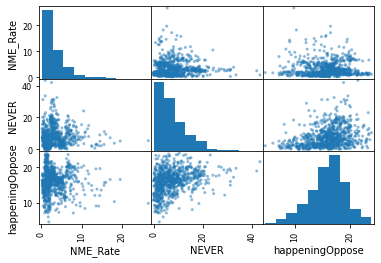

In [91]:
pd.plotting.scatter_matrix(trial, diagonal="hist");

In [92]:
corrmat = trial.corr()
corrmat

,NME_Rate,NEVER,happeningOppose
NME_Rate,1.000000,0.043265,-0.043598
NEVER,0.043265,1.000000,0.305799
happeningOppose,-0.043598,0.305799,1.000000


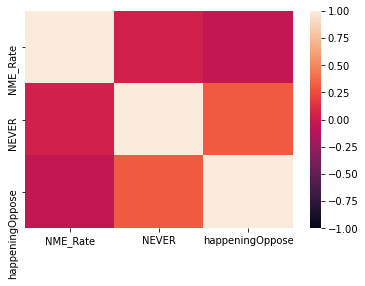

In [93]:
sns.heatmap(corrmat, vmin=-1, vmax=1., square=False);